In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

numpy is used to load the dataset csv. skiprows are used to skip the first row which only contains headers

In [26]:
data = np.loadtxt('PADL-Q1.csv',delimiter=',',skiprows=1)


the variance of every feature is printed before applying PCA. this is done to ensure that the total variance before PCA is the same after PCA. Also knowing the variance of every feature is crucial to be able to determine the miniumum number of dimensions that we can get reduced into after PCA. Because if the chosen minumum componenets contain contain the features that have the most varience, then the other principal components can be neglected as most the features with most variance are already included in the preceeding principal components. The variance is calculated using numpy.

In [27]:
totVar = 0
for i, dim in enumerate(('first','second','third','fourth','fifth')):
  var = np.var(data[:,i])
  totVar+=var
  print('Here is the sample variance for the {0} dimension'.format(dim))
  print('var = {0}\n\n'.format(var))

print("totVar=", totVar)

Here is the sample variance for the first dimension
var = 2.048653995434412


Here is the sample variance for the second dimension
var = 8.039105393081824


Here is the sample variance for the third dimension
var = 17.885689822024325


Here is the sample variance for the fourth dimension
var = 32.314479829829196


Here is the sample variance for the fifth dimension
var = 54.41702008103843


totVar= 114.70494912140819


PCA is first initialized with number of components equal to our number of features, then it is fitted to our data to compute the principal components of our dataset. Each principal component has its eigenvalues which is the amount of variance that every principal component capture. the fit_transform function is used to create a new dataset which resembles the original dataset when projected into the new principal components

In [28]:
pca = PCA(n_components=5)
pca.fit(data)
newData = pca.fit_transform(data)

After applying PCA and getting the new dataset with the new principal components. the value of the variance of every component and the total of all components is calculated, to make sure that the new dataset total variance is equal to the original dataset total variance, but now the variance is concenterated in the beginning principal components.

In [29]:
totVar = 0
for i, dim in enumerate(('first','second','third','fourth','fifth')):
  var = np.var(newData[:,i])
  totVar+=var
  print('Here is the sample variance for the {0} dimension'.format(dim))
  print('var = {0}\n\n'.format(var))

print("totVar=", totVar)

Here is the sample variance for the first dimension
var = 61.76434650173085


Here is the sample variance for the second dimension
var = 34.48928083288869


Here is the sample variance for the third dimension
var = 11.772455728127955


Here is the sample variance for the fourth dimension
var = 5.283110268309786


Here is the sample variance for the fifth dimension
var = 1.3957557903509359


totVar= 114.7049491214082


The explained variance ratio is the percentage of the variance of each prinicipal component divided by the total variance. this is crucial to know in order to determine the minumum needed number of dimensions that wont result in little or no information loss.

In [30]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.53846279 0.30067823 0.1026325  0.04605826 0.01216823]


to determine the minimum number of dimensions, loadings of every feature in each principal component is plotted, the loadings is used to interpret how much each feature contribute each principal components. As seen by the plots, the first three principal components, the features with most variance contribute most to them.

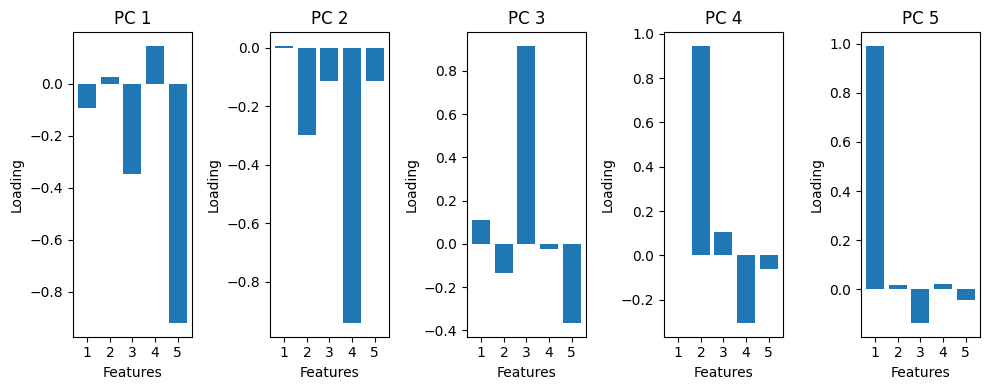

In [34]:
loadings = pca.components_
num_pc = len(pca.explained_variance_ratio_)
num_features = data.shape[1]
plt.figure(figsize=(10, 4))
for i in range(num_pc):
    plt.subplot(1, num_pc, i + 1)
    plt.bar(np.arange(num_features), loadings[i])
    plt.title(f'PC {i + 1}')
    plt.xlabel('Features')
    plt.ylabel('Loading')
    plt.xticks(np.arange(num_features), labels=np.arange(1, num_features + 1))
plt.tight_layout()
plt.show()

The mininum number of dimensions was chosen to be 3, this is because the first 3 principal contain approximatly 95% of the total variance based on the explained variance ratio calculation, which will result in very low loss in information. Also by interpreting the loadings plot, it can be seen that the features with most variance has a very strong influence and correlation with the first 3 principal components. Moreover, 95% is commonly used as variance coverage thereshold, and the first 3 components have nearly 95% of the total variance of all features. Taking only the first 3 principal components will result in a very little information loss, however it save us alot because the dimensions are reduced from 5 to 3 which is really helpful.

In [35]:
pca = PCA(n_components=3)
pca.fit(data)
minData = pca.fit_transform(data)

first, the explained variance of the principal components is extracted, the explained variance is the ratio of the variance in the component by the total variance in all components. np.argsort returns the indexes of the in an order that would make the array sorted. the array of principal components is sorted based on their value of explained variance. slicing is used to reverse the array as the default argsort return the array sorted in ascending order. After that, a loop that literates over the sorted indexes array is constructed, a variable to store the parts of each equation for every index is initialized. then each feature in the original dataset is literated over to get its coefficients for the principal component that its iterating over. Then the coeifficient and the index of the feature is added to the parts. finally, the parts that we gor is iterated over to print the equations.

In [36]:

sorted_indices = np.argsort(pca.explained_variance_)[::-1]

for i in sorted_indices:
    print(f"Principal Component {i+1}:")
    parts = []
    for j in range(data.shape[1]):
        coefficient = pca.components_[i, j]
        parts.append((coefficient, j + 1))
    for part in parts:
        print(f"{part[0]} * x{part[1]}", end=" ")
        if part != parts[-1]:
            print("+", end=" ")
    print("\n")

Principal Component 1:
-0.09281878980481824 * x1 + 0.025271864878144812 * x2 + -0.3487698084971414 * x3 + 0.14508262540371697 * x4 + -0.9208999172502852 * x5 

Principal Component 2:
0.005623623398806438 * x1 + -0.298704634907195 * x2 + -0.11422130504512426 * x3 + -0.9406225721091186 * x4 + -0.11369514614723963 * x5 

Principal Component 3:
0.11266752492394691 * x1 + -0.13315621955233634 * x2 + 0.9142030225981608 * x3 + -0.023934285672261336 * x4 + -0.3650142921363313 * x5 

